<a href="https://colab.research.google.com/github/MariaPaulaMar/analisis-donacion-sangre/blob/main/Lectura_Sangre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dar vida: predecir las donaciones de sangre


Dar vida parece ser imposible, pero no es así. Todos en el mundo tenemos la oportunidad de hacerlo, donar sangre es una opción. Al día son millones las personas que esperan algunos litros de sangre para salvar su vida. La alta demanda de sangre exige que la recolección sea de una manera amplia. Hoy en día la única manera de obtener este líquido vital es a través de la donación de las personas. Se requiere de un número significativo de donantes para cubrir esta necesidad. Sin embargo, no es suficiente con esto, es importante que las personas que han donado sigan ejerciendo esta práctica.

En este proyecto, se trabajará con datos recopilados de la base de datos de donantes del Centro de servicios de transfusión de sangre en la ciudad de Hsin-Chu en Taiwán. El centro pasa su autobús de servicio de transfusión de sangre a una universidad en la ciudad para recolectar la sangre donada aproximadamente cada tres meses. El conjunto de datos, obtenido del repositorio de aprendizaje automático de UCI, consta de una muestra aleatoria de 748 donantes. El objetivo será predecir si una persona donará dentro de un período de tiempo determinado.

Para empezar con el desarrollo del proyecto se importarán las siguientes librerías:
*   **Pandas:** Librería empleada para manejar DataFrame y manipulación de datos. Se importa usualmente con el alias pd de la siguiente manera: `import pandas as pd `
*   **Numpy:** Librería usada para manipular arreglos. Se importa usualmente con el alias np de la siguiente manera: `import numpy as np`
*   **Matplotlib:** Librería para realizar gráficos, en particular usaremos el método pyplot que facilita la creación de estos. Se importa usualmente con el alias plot de la siguiente manera: `import matplotlib.pyplot as plot`
*   **Seaborn:** Librería para realizar gráficos estadísticos y visualización de datos. Se importa usualmente con el alias sbn de la siguiente manera: `import seaborn as sbn`



In [ ]:
# Dependencias Generales
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

La lectura del archivo se realizará con el comando: 

```
pd.read_cvs("Nombre de mi archivo csv.csv")
```
El *pd* es el alias que se le asigna a la librería pandas. *read_csv* es el método que permite la lectura del archivo.



In [ ]:
# Se obtiene el archivo del repositorio.
url="https://raw.githubusercontent.com/Raspiani/Give-Life-Predict-Blood-Donations/master/datasets/transfusion.data" 
# Lectura del DataFrame.
data = pd.read_csv(url,lineterminator='\r')

In [ ]:
data.head()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


##Análisis Variables




El estudio de la base de datos hará uso de una variación del modelo RFM. Es usado en el marketing para:

1.   Aumentar la cifra de ingresos de la marca.
2.   Realizar segmentación de clientes como técnica para conocer su comportamiento.
3.   Concretar quienes son los mejores clientes.
4.   Conocer la tasa de abandono.

Este realiza una segmentación de los clientes teniendo en cuenta las variables RFM:


* **Recencia:**  ¿Cuándo fue la última vez qué el cliente hizo una compra?
*  **Frecuencia:** Define el número de interacciones del cliente con la marca en un período determinado de tiempo.
*  **Valor monetario:** Refleja la cantidad que se ha gastado el cliente en las compras.

De modo que aquí tendremos el modelo aplicado y variado de la siguiente manera:


1.   Los clientes serán los donantes.
2.   Segmentar los donates para ver el compartimiento respecto a su próxima donación.
3.   Preguntar: ¿cuándo fue la última vez que el donante hizo su última donación?
  *   Primera variable R (Recency): Meses desde la última donación.
4.   Analizar la cantidad de veces que ha interactuado con las campañas.
  *  Segunda varaible F (Frecuencia): Número total de donaciones.
5.   Calcular la cantidad de sangre que ha donado en total. 
  *  Tercera variable M (Monetario): Total de sangre donada en cc.
6.  Verificar el tiempo (meses) transcurridos desde su primera donación.
  *  Cuarta variable T (Tiempo): Meses desde la primera donación.
7.   Realizar una predicción con base a la segmetación de los datos y las variables anteriormente mencionadas.
  *  Quinta Variable P (Predicción): Variable booleana a estudiar. 
        *   1 si la persona donó sangre en marzo del 2007.
        *   0 si la persona no donó sangre en marzo del 2007.

Con el comando *data.info( )* se obtendrá información sobre la base de datos.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


Las variables son todas de tipo entero. Sin embargo, la última variable debe ser de tipo booleana. Debe interpretarse y analizarse como un atributo cualitativo asimétrico: 1 si donó sangre, 0 si no.

Para corregir esto se emplea el siguiente comando:

```
data['variable que deseo cambiar'] = data['variable que deseo cambiar'].astype('el tipo que quiero que sea')
```
entonces el *data[ ' ' ].* indicará la columna a modificar. El método  *astype* ejecuta el cambio de tipo de dato.



 




In [ ]:
data['whether he/she donated blood in March 2007'] = data['whether he/she donated blood in March 2007'].astype('boolean')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Recency (months)                            748 non-null    int64  
 1   Frequency (times)                           748 non-null    int64  
 2   Monetary (c.c. blood)                       748 non-null    int64  
 3   Time (months)                               748 non-null    int64  
 4   whether he/she donated blood in March 2007  748 non-null    boolean
dtypes: boolean(1), int64(4)
memory usage: 25.0 KB


##Renombrar las columnas del DataFrame



El método *rename* permite renombrar las columnas del *DataFrame* mediante un diccionario. La llave indica el nombre predeterminado de las columnnas; y el valor, su nueva asignación.

In [ ]:
data.rename(
    columns={'Recency (months)':'Recency',
             'Frequency (times)':'Frequency',
             'Monetary (c.c. blood)': 'Monetary', 
             'Time (months)' : 'Time',
             'whether he/she donated blood in March 2007': 'Donated'},
    inplace=True)

In [ ]:
data

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,True
1,0,13,3250,28,True
2,1,16,4000,35,True
3,2,20,5000,45,True
4,1,24,6000,77,False
...,...,...,...,...,...
743,23,2,500,38,False
744,21,2,500,52,False
745,23,3,750,62,False
746,39,1,250,39,False


**Integrantes:**
*   Andrés Felipe Sandoval Salazar  20191167010
*   Iván Javier Parra Espejo        20191167013
*   María Paula Martínez Huertas    20191167025
*   Yeimy Lorena Lozano Clavijo     20191167048

#Estadística Descriptiva

Se realizará un análisis de las medidas de tendecia central y de dispersión para cada una de las variables mencionadas.

###Variable Recency

Para obtener una descripción estadística de la varaible Recency, se emplean los siguentes comandos:





 



```
print(data["Recency"].describe())
print('median=   '+ str(data['Recency'].median()))
print('mode=     ' + str(data['Recency'].mode()[0]))
```

Aquí el `data[ ' ' ]` es la variable que se quiere describir. 

El método `describe ( )` obtiene la cantidad de elementos almacenados, la media, la desviación estándar, el mínimo, los cuartiles y el máximo de los datos en la columna Recency.

El método `median ( )` obtiene la mediana.

El método `mode ( )[ 0 ]` obtiene la moda.

In [ ]:
print(data["Recency"].describe())
print('median=   '+ str(data['Recency'].median()))
print('mode=     ' + str(data['Recency'].mode()[0]))

NameError: ignored

* El tamaño de la muestra es $748$ datos no nulos.
* El donante con menor cantidad de meses realizó su última donación hace $0$ meses y el donante con mayor cantidad de meses realizó su última donación hace $74$ meses. 

La distribución de la variable Recency permite ver gráficamente los siguientes datos:
* La moda de Recency es de $2$ meses. En otras palabras la mayoría de los donantes realizó su última donación hace $2$ meses.
* La media de Recency de los donantes es de $9.506684$. Lo que quiere decir que en promedio cada donante donó por última vez hace $9$ meses.
* La mediana de Recency es de $7$ meses. Este valor dividirá los datos en la mitad.

In [ ]:
plot.figure(figsize=(20,7.5)) #tamaño de la figura
data['Recency'].plot.kde(label='Curva de distribución',color='black',grid=True) #Gráfica la distribución de la variable Recency.
plot.axvline(x=data['Recency'].mean(), ymin=0, ymax=1,label='Media',color='blue') #Recta que representa la media en la distribución. 
plot.axvline(x=data['Recency'].mode()[0], ymin=0, ymax=1,label='Moda',color='red')#Recta que representa la moda en la distribución.
plot.axvline(x=data['Recency'].median(), ymin=0, ymax=1,label='Mediana',color='green') #Recta que representa la mediana en la distribución.
plot.title('Curva de distribución de la variable Recency')
plot.text(data['Recency'].mean()+1,0.05,round(data['Recency'].mean(),1),color="blue",fontsize=16,rotation=0) #Valor de la media.
plot.text(data['Recency'].mode()[0]+1,0.03,data['Recency'].mode()[0],color="red",fontsize=16,rotation=0) #Valor de la moda.
plot.text(data['Recency'].median()-4,0.01,round(data['Recency'].median(),3),color="green",fontsize=16,rotation=0) #Valor de la mediana.
plot.ylabel('Densidad')
plot.xticks(np.arange(0,76,5)) # Escala del eje x.
plot.legend() # Recuadro de etiquetas para identificar cada elemento del gráfico.
plot.show() # Muestra el gráfico.

La distribución de Recency no es normal, de modo que la desviación estándar no ofrece una información asertiva respecto a la media. Sin embargo, se puede hacer el cálculo del coeficiente de variación; el cual nos dirá  porcentualmente qué tan dispersos se encuentran los datos.

In [ ]:
#data['Recency'].std() es la desviación estandar de la variable Rencency
#data['Recency'].mean() es la media de la variable Recency

#Formula del coeficiente de variación tomandolo porcentualmente
coef_variación= (data['Recency'].std()/data['Recency'].mean())*100  
coef_variación

Con un porcentaje de coeficiente de variación del $85.154\%$ se afirma que los datos se encuentran altamente dispersos respecto a la media.

El diagrama de caja permite evidenciar la siguiente afirmación:
* Una cuarta parte de los donantes realizó su última donación hace menos de $Q_1= 2.75$ meses. La mitad de los donantes realizó su última donación hace menos de $Q_2= 7$ meses, y la otra mitad hace más de $Q_2= 7$ meses. Por otra parte, las tres cuartas partes de los donantes donarón por última vez hace más de  $Q_3= 14$ meses.

In [ ]:
plot.figure(figsize=(30,15)) #Área de impresión de la gráfica.
plot.subplot(221)  #Ubicación del primer gráfico.
plot.title("Diágrama de cajas de la variable Recency")   #Título del gráfico.
plot.xlabel('Cantidad de meses desde la última donación ')  #Nombre del eje x.
plot.grid(True) # Activación de la cuadricula de medición.
plot.xticks(np.arange(0,80,3)) # Escala del eje x.
plot.boxplot(data['Recency'],vert=False,patch_artist=True); #Comando para hacer el diagráma de caja.


plot.subplot(222)
plot.title("Histográma de la variable Recency")   #Título del gráfico.
plot.ylabel('Cantidad de personas')  #Nombre del eje y.
plot.xlabel('Cantidad de meses desde la última donación')  #Nombre del eje x.
freq, bins, patches = plot.hist(data['Recency'], bins=range(0,75,1),
          align='mid',
          orientation='vertical',
          color='green',ec='k')  #Comando para hacer el Histográma.

# x coordinate for labels
bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plot.annotate("{}".format(height),
                 xy = (x, height),             # Esquina superior izquierda de la barra de histograma
                 xytext = (0,0.2),             # Desplazamiento de la posición de la etiqueta por encima de su barra
                 textcoords = "offset points", # Compensación (en puntos) del valor *xy*
                 ha = 'center', va = 'bottom')
    n = n+1

plot.xticks(np.arange(0,76,2)) # Escala del eje x.
plot.yticks(np.arange(0,176,10)) # Escala del eje y.
plot.grid(True) # Activación de la cuadrícula de medición.

En el diagrama de caja se observa que la media se ubica más hacia la izquierda, esto se debe a que hay una mayor concentración de donantes para esos meses. Por otra parte, después del último bigote hay unos puntos a los cuales se les denominará outlier. Estos datos son los que no se tendrán comúnmente. 

Comparando con el histograma se evidencia que los datos de menor frecuencia son aquellos que representan una cantidad mayor de meses.

Para ver que efectivamente existen estos outliers tenemos el siguiente criterio:

In [ ]:
#se calcula el valor de los cuartiles
Q1=data['Recency'].quantile(0.25)
Q2=data['Recency'].quantile(0.50)
Q3=data['Recency'].quantile(0.75)
RI=Q3-Q1
# Se calcula el valor del bigote superior
BS=Q3+1.5*RI
print('Bigote superior es: ', BS)
# Se calcula el valor del bigote inferior
BI=Q1-1.5*RI
print('Bigote inferiór es: ', BI)

Si el valor mínimo de la variable Recency es menor que el bigote inferior entonces se presentarían outliers inferiores. En este caso el valor mínimo es $0$ meses, por lo que no existe outlier inferior y además el bigote en la gráfica tomará el valor mínimo de los datos, es decir, $0$ meses. Nótese que el bigote superior es $30.875$ pero el valor máximo es de $74$, por tanto existirán outliers superiores.

Con el siguiente comando se obtiene con precisión cuales son los outliers con respecto a la variable Recency :

In [ ]:
data[data['Recency']>=30.875]

##Variable Time

Para realizar el análisis correspondiente a esta variable, se hará un estudio inicial de sus medidas estadísticas a través del método `.describe()`, observando que:
+ Exiten $748$ datos no null de la variable.

+ La media aritmética con respecto a count es $34.28$ meses. El valor de esta información se determinará en que tan lejos se encuentra de la mediana, o si existe la presenciencia de outliers.

+ La desviación estándar del tiempo con respecto a su media es $24.37$ meses en promedio.

+ El valor mínimo es de $2$ meses y el valor máximo es $98$ meses.

+ Los cuartiles determinan:
 +	El $25\%$ de las personas donaron por primera vez hace máximo $Q_1=16$ meses desde su primera donación.
 *El $50\%$ de las personas donaron por primera vez hace máximo $ Q_2=28$ meses desde su primera donación.
 +   El $75\%$ de las personas donaron por primera vez hace máximo $Q_3=50$ meses desde su primera donación.
     
     

In [ ]:
data['Time'].describe() #describe las medidas estadísticas de la variable.

In [ ]:
data.head()

Después de explorar el diagrama de barras y el histograma, se representará gráficamente las medidas de tendencia central haciendo uso de la curva de distribución.

Ahora, a través del diagrama de barras se puede observar que:
+ La moda equivale a $4$ meses con una frecuencia de $57$ personas, representando el $7.6\%$ del total de datos.


In [ ]:
plot.figure(figsize=(20,7.5)) #tamaño de la figura
splot = data['Time'].value_counts().sort_index(ascending=True).plot(kind='bar',
                                                             fontsize = 15, 
                                                             color='pink',
                                                             ec='black') #creación de la gráfica de barras 
for p in splot.patches: 
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points') 

plot.xlabel('Meses') #Etiqueta del eje x
plot.ylabel('Cantidad de personas') #Etiqueta del eje y
plot.title('Meses trancurridos después de la primera donación ') # Título de la gráfica
plot.grid(axis='y') #rejillas horizontales
plot.savefig('Time.png')

Graficando la distribución normal de la variable 'Time', se observa que:
+ La distribución está sesgada positivamente (hacia la izquierda),  la moda $=4$ $<$ mediana $=28$ $<$ media $=34.28$.
+La mejor medida de tendencia central para la variable Time es la mediana. Esta medida es más confiable cuando se presenta una distribución asimétrica de los datos. 

In [ ]:
plot.figure(figsize=(20,7.5)) #tamaño de la figura
data['Time'].plot.kde(label='Curva de distribución',color='black',grid=True) #se gráfica la curva de distribución.
plot.axvline(x=data['Time'].mean(), ymin=0, ymax=1,label='Media',color='darkblue') #plot.axvline() permite gráficas de rectas verticales.
plot.axvline(x=data['Time'].mode()[0], ymin=0, ymax=1,label='Moda',color='red')
plot.axvline(x=data['Time'].median(), ymin=0, ymax=1,label='Mediana',color='green')
plot.title('Curva de distribución de la variable Time')
plot.ylabel('Densidad')
plot.legend() #permite mostrar la tabla donde se indica que color corresponde a cada nombre de curva.
plot.show() #permite mostrar la gráfica 



La distribución de Time no es normal, de modo que la desviación estandar no ofrece una información asertiva respecto a la media. Sin embargo, con base a ella se puede hacer el cálculo del coefiente de variación; el cual dirá porcentualmente qué tan dispersos se encuentran los datos.

In [ ]:
#Formula del coeficiente de variación tomándolo porcentualmente
coef_variación= (data['Time'].std()/data['Time'].mean())*100  
coef_variación

Con un coeficiente de variación del $71.11\%$ se puede afirmar que los datos se encuentran altamente dispersos respecto a la media.

Para analizar qué tan dispersos se encuentran los datos se trabajará el rango intercuartil que permitirá abarcar el $50\%$ central de los datos.

Utilizando el diagrama de cajas y bigotes se observa que:
+ El valor mínimo es $2$ meses.
+ Los cuartiles $Q_1$, $Q_2$ y $Q_3$ están representados por las rectas horizontales que conforman la caja respectivamente.
+ El cuartil $Q_2$ sin el cuartil $Q_1$ representa la menor cantidad de frecuencia entre los tres cuartiles.

Considerando  que  la desviación estandar es de $24.37$ meses, se tiene una varianza aproximada de $593.8969$ meses.

In [ ]:
data['Time'].plot(kind="box", fontsize = 15,color='red') #Se gráfica el diagrama de cajas y bigotes 

plot.ylabel('Meses') #Etiqueta del eje y
plot.title('Meses trancurridos después de la primera donación ') #Título de la gráfica
plot.grid(axis='y') #activa las rejillas horizontales 
plot.savefig('Time.png') #permite guardar la figura como Time.png

Con base al cálculo del bigote inferior y del bigote superior, el diagrama de cajas permitirá observar que no existe ningún outlier en la variable Time. 

In [ ]:
#se calcula el valor de los cuartiles
Q1=data['Time'].quantile(0.25)
Q2=data['Time'].quantile(0.50)
Q3=data['Time'].quantile(0.75)
RI=Q3-Q1
# Se calcula el valor del bigote superior
BS=Q3+1.5*RI
print('Bigote superior es: ', BS)
# Se calcula el valor del bigote inferior
BI=Q1-1.5*RI
print('Bigote inferiór es: ', BI)

Si el valor mínimo de la variable Time es menor que el bigote inferior, entonces se tendría un outlier inferior. En este caso, el valor mínimo es $2$ meses por lo que no existe outlier y además, el bigote en la gráfica tomará el valor mínimo de los datos, es decir, $2$ meses. Análogamente, el bigote superior toma  el valor máximo de la variable que es $98$ meses.

##Variable Monetary

La variable 'Monetary' es una variable cuantitativa continua que representa la cantidad de sangre donada por una persona, haciendo uso del método `Describe()` se hará un análisis descriptivo de esta, observando que:

*  La variable tiene un total de $748$ datos, ninguno vacío.
*  La media aritmética o promedio de datos está rondeando los $1348.64cc$ (El valor de esta información está determinada por la diferencia respecto los outliers).
*   La desviación estándar de los datos respecto a su media es de 1459.82cc.
*   La persona con menor volúmen de sangre donada registra $250cc$, mientras que la persona que más ha donado lo ha hecho por un total de $12500cc$.

Los cuartiles determinan:

+ La cuarta parte de las personas ha donado a lo más $Q_1=500cc$.

+ El 50% de las personas ha donado menos de $Q_2=1000cc$.

+ El 75% de las personas ha donado $Q_3=1750cc$ a lo más.


In [ ]:
data['Monetary'].describe()

#### Medidas de tendencia central.
El historgrama y líneas de distribución servirán para representar gráficamente la posición de las medidas de distribución central en el conjunto de datos. Se organiza el dataframe respecto la variable.

In [ ]:

data.sort_values(by='Monetary')  #Organizar el data frame respecto la variable 'Monetary'.



Para realizar el histograma se debe garantizar que cada valor tenga su respectiva representación de frecuencia. Para ello se agrupan los datos. Con esta tabla de frecuencias se podrá interpretar el histograma.


In [ ]:
data["Monetary_group"] = pd.cut(data["Monetary"], bins=12)
print((data.groupby("Monetary_group").agg(frequency=("Monetary", "count"))))

El resultado anterior muestra una distribución en 12 intervalos de frecuencia, dejando notar que la mayoría de datos se encuentran entre los $237.75cc$ y $1270.8cc$.

In [ ]:
plot.figure(figsize=(20,7.5))

data['Monetary'].plot(kind="hist", fontsize = 8, color='lightblue',ec='black',bins=100)
plot.xlabel('Monetary')
plot.ylabel('Número de personas')
plot.title('Volumen de sangre donada')
plot.grid(axis='y')

In [ ]:
plot.figure(figsize=(10,15))
plot.title("Diagrama de Cajas") #Título del gráfico.
plot.xlabel('Volumen de sangre donada')  #Nombre del eje x.
plot.grid(True) # Activación de la cuadricula de medición.
plot.xticks(np.arange(0,1500,30)) # Escala del eje x.
plot.yticks(np.arange(0,20000,500))
plot.boxplot(data['Monetary'],vert=True,patch_artist=True); #Comando para hacer el diagrama de caja.

In [ ]:
#se calcula el valor de los cuartiles
Q1=data['Monetary'].quantile(0.25)
Q2=data['Monetary'].quantile(0.50)
Q3=data['Monetary'].quantile(0.75)
RI=Q3-Q1
# Se calcula el valor del bigote superior
BS=Q3+1.5*RI
print('Bigote superior es: ', BS)
# Se calcula el valor del bigote inferior
BI=Q1-1.5*RI
print('Bigote inferior es: ', BI)

Los datos anteriores permiten ver que efectivamente existen outliers (superiores) en la variable. Gráficamente se ven como los puntos que están por encima del bigote superior.

La mayoría de las personas han donado $250cc$ de sangre a lo largo de su vida.  Al ser el dato con más frecuencia, corresponde a la moda de la variable.

In [ ]:
k= data['Monetary'].mode()[0] #Cálculo de la moda.
print('El valor de la moda es: ',k)

A continuación se realiza el gráfico de la curva de distribución con sus respectivas medidas de tendencia central.

In [ ]:
plot.figure(figsize=(20,7)) #tamaño de la figura
plot.title("Curva de distribución de la variable Monetary")   #Título del gráfico.
data['Monetary'].plot.kde(label='Curva de distribución',color="black",grid=True)
plot.axvline(x=data['Monetary'].mean(), ymin=0, ymax=1,label='Media',color='darkblue') #plot.axvline() permite gráficas de rectas verticales.
plot.axvline(x=data['Monetary'].mode()[0], ymin=0, ymax=1,label='Moda',color='red')
plot.axvline(x=data['Monetary'].median(), ymin=0, ymax=1,label='Mediana',color='green')
plot.text(data['Monetary'].mean(),0.0004,round(data['Monetary'].mean(),1),color="blue",fontsize=16,rotation=0) #Valor de la media.
plot.text(data['Monetary'].mode()[0]+1,0.0003,data['Monetary'].mode()[0],color="red",fontsize=16,rotation=0) #Valor de la moda.
plot.text(data['Monetary'].median()+400,0.0001,round(data['Monetary'].median(),1),color="green",fontsize=16,rotation=0) #Valor de la mediana.
plot.legend() #permite mostrar la tabla donde se indica que color corresponde a cada nombre de curva.
plot.show()

Se puede observar que la distribución de la variable no es normal (cuando lo es, las tres medidas de tendencia tienden a superponerse). De la gráfica se puede concluir que la mayor parte de los datos se encuentra entre los $0cc$ Y $2500cc$.

## Variable Frequency

La variable Frequency es una variable cuantitativa discreta de tipo float64, que describe el número total de donaciones desde la primera vez.

Para realizar el análisis correspondiente a esta variable, se hará un estudio inicial de sus medidas estadísticas a través del método `describe()`.

In [ ]:
data.Frequency.describe()

Obteniendo los siguientes resultados:
- La media de la variable Frequency es aproximadamente $5.5147$ donaciones desde la primera vez.
- La desviación estándar es aproximadamente $5.8393$.
- La persona que menos veces ha donado, lo ha hecho en una oportunidad. Mientras que la más recurrente, lo ha hecho en $50$ ocasiones.
- Un cuarto de la población ha donado $2$ veces desde su primera donación. La mitad de la población ha donado menos de $4$ veces desde su primera donacion y por último, tres cuartas partes de la población ha donado menos de $7$ veces desde su primera donación.

In [ ]:
m1 = data.Frequency.mode()[0] # Cálculo de la moda.
print("La moda es:", m1)
m2 = data.Frequency.median() # Cálculo de la mediana.
print("La mediana es:", m2)

Además de las medidas de dispersión anteriormente trabajadas, se puede obtener información relevante a través de la moda indicando que las personas han donado en su mayoría una vez; y la mediana, muestra que la mitad de la población ha donado $4$ veces desde su primera donación.  

Para ver estos datos de una manera más entendible, se usan distintos diagramas que van acordes a la variable Frequency. Se realiza un diagrama de densidad con el fin de ver la distribución que siguen los datos y adicionalmente resaltar la media, mediana y moda en dicho diagrama. 

In [ ]:
plot.figure(figsize = (13,7.5)) # Escala gráfico
data.Frequency.plot.density(label = 'Curva de distribución', color = 'black', grid = True) # Gráfica la distribución de la variable Recency
plot.axvline(x = data['Frequency'].mean(), ymin = 0, ymax = 1, label = 'Media', color = 'darkblue') # Recta que representa la media en la distribución 
plot.axvline(x = data['Frequency'].mode()[0], ymin = 0, ymax = 1, label = 'Moda', color = 'red')# Recta que representa la moda en la distribución
plot.axvline(x = data['Frequency'].median(), ymin = 0, ymax = 1, label = 'Mediana', color = 'darkgreen') # Recta que representa la mediana en la distribución
plot.xticks(np.arange(-25,80,5)) # Escala del eje x
plot.legend() # Recuadro de etiquetas para identificar cada elemento del gráfico.
plot.ylabel("Densidad") # Título eje y
plot.xlabel("Frequency") # Título eje x
plot.title("Distribución variable Frequency") # Título gráfica
plot.show() # Me muestra el gráfico

Según el gráfico la variable Frequency no tiene una distribución normal. Esto se argumenta teniendo en cuenta que para la variable *moda $<$ mediana $<$ media*, lo cual indica que la distribución está sesgada positivamente. Por tal motivo, la desviación estándar es inadecuada para saber qué tan dispersos se encuentran los datos con relación a la media. Se calculará el coeficiente de variación para tener una mejor información al respecto.

In [ ]:
#Fórmula del coeficiente de variación tomándolo porcentualmente
coef_variación= (data.Frequency.std()/data.Frequency.mean())*100  
print("Coeficiente de variación:",coef_variación)

Como el porcentaje del coeficiente de variación es demasiado alto (incluso mayor que el $100\%$) se puede afirmar que los datos de la variable Frequency son demasiado heterogéneos, es decir, se encuentran muy dispersos de la media. 

Mediante un diagrama de caja se podrá ver de una mejor manera cómo están ubicados los datos respecto a la media.

In [ ]:
plot.figure(figsize = (13,7.5))
data.Frequency.plot.box(color = "darkblue",
                        title = "Total de Donaciones",
                        grid = True,
                        yticks = range(0,60,5))

Según el diagrama se evidencia que hay varios outliers, lo que reafirma el hecho de que los datos se encuentran muy dispersos con respecto a la media. Para demostrar la existencia de estos outliers en el diagrama de caja anterior, se realizará el cálculo de los bigotes.

In [ ]:
# Se calcula el valor de los cuartiles
Q1 = data.Frequency.quantile(0.25)
Q2 = data.Frequency.quantile(0.50)
Q3 = data.Frequency.quantile(0.75)
RI = Q3-Q1
# Se calcula el valor del bigote superior
BS = Q3 + 1.5*RI
print("Bigote superior:", BS)
# Se calcula el valor del bigote inferior
BI = Q1 - 1.5*RI
print("Bigote inferiór:", BI)

Como el valor mínimo de la variable es una $1$ donación y el resultado del bigote inferior es menor que dicho valor, se asegura que no existen outliers inferiores. Además, el bigote en la gráfica tomará el valor mínimo de los datos, es decir, una donación. Por otro lado, el valor máximo de la variable es de $50$ donaciones, el cual es mayor al bigote superior, lo que garantiza la existencia de outliers superiores.  

Se realizará un gráfico de barras para evidenciar la frecuencia absoluta de cada dato de la variable Frequency.

In [ ]:
df_Frequency = data["Frequency"].value_counts()

In [ ]:
# Comando para poner etiquetas a las barras.
plot.figure(figsize = (13,7.5))
splot = df_Frequency.plot.bar(color = "darkblue",
                      grid = True,
                      title = "Total de donaciones desde la primera donación",
                      xlabel = "Cantidad de donaciones",
                      ylabel = "Cantidad de personas")

for p in splot.patches: 
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points') 

NameError: ignored

Según el gráfico se afirma que la mayor parte de la muestra ha donado entre 1 y 11 veces. Por otro lado, los valores con menor frecuencia son aquellos que tiene una alta cantidad de donaciones.

##Variable Donated

La variable Donated es de tipo booleana y será el objetivo de predicción de este proyecto. 

In [ ]:
plot.figure(figsize=(20,7.5)) #tamaño de la figura
data['Donated'].value_counts().plot(kind='pie',
                                    autopct='%.f%%', #Permite tener visibles los porcentajes en cada una de las secciones de la gráfica.
                                    title='Personas que donaron en marzo del 2007', #Título de la gráfica.
                                    colors=['gray', 'red'], #Colores de cada sección del gráfico de tarta.
                                    explode=[0.1,0.1], #separación de cada sección con el centro del gráfico.
                                    fontsize=15,labels=['No','Sí']) #permite graficar el diagrama de tarta de la variable.

Con esta información se puede concluir que el $76\%$ de las personas no donó en Marzo del $2007$, y que un $24\%$ sí lo hizo.

Observe ahora el comportamiento de la variable 'Donated' con respecto a las demás variables.

In [ ]:
sns.pairplot(data=data,vars=['Recency', 'Frequency','Monetary','Time'],palette=['gray','red'], hue='Donated') #gráfico que permite relacionar dos a dos cada variable con una escala de colores definida por una tercera variable.
plot.show() #permite mostrar el.black, cyanc

Se puede observar que:
+ Si se escoge una persona que haya donado en marzo del $2007$ , es más problable que el tiempo transcurrido desde su última donación sea bajo.

+ Las personas que donaron en marzo del $2007$, tienen en su mayoria una frecuencia de donación alta. En consecuencia también la cantidad de centímetros cúbicos de sangre donados será elevada.

+ El tiempo transcurrido desde la primera donación no muestra mayor relación con respecto a la probabilidad de que una persona haya donado o no en marzo del $2007$. 

+ La frecuencia y la cantidad de sangre donada tienen una relación lineal.

## Matriz de correlación.

In [ ]:
corr_matrix = data.iloc[:,0:4].corr() # Comando para hacer la matriz de correlación.
corr_matrix

In [ ]:
plot.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True) #Gráfica de la matriz de correlación.

En esta matriz se puede verificar que las variables se correlacionan de la siguiente manera:
1. Las variables Frequency y Monetary se correlacionan linealmente: el volumen de sangre donado crecerá a mayor número de donaciones. 
2. A mayor número de donaciones (Frequency) se tendrá que el tiempo que ha transcurrido desde la primera donación (Time) ha aumentado. Sin embargo, se evidencia que la correlación no es muy alta. Una persona que haya donado hace varios años pudo no volver a ejercer esta práctica. 


In [ ]:
del(data['Monetary_group'])
data

Se realiza una partición de los datos, entre datos entrenamiento y datos de prueba para realizar machine learning. 

In [ ]:
# Importar train_test_split
from sklearn.model_selection import train_test_split

# Se particionan los datos en los siguientes conjunto de datos
# X_train, X_test, y_train and y_test,
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='Donated'), #Conjunto de datos que entrenan la maquina.
    data.Donated, #Conjunto de datos de predicción o variable objetivo
    test_size=0.25, #tamaño de los nuevos datos de entrenamiento.
    random_state=0, #semilla original
    stratify=data.Donated #permite tener en cada categoria nueva la misma proporción de datos que el DataFrame original.
) #Arroja cuatro matrices de tipo Numpy dos que hacen parte del entrenamiento X_train y y_train y dos de prueba X_test y y_test

# Print out the first 2 rows of X_train
X_train.head(100)

#Inferencia Estadística

Se importan los paquetes que se van a usar. Note que (`!pip install tpot`) no se está ejecutando ya que se debe instalar cada vez que se abra el documento.  Se recomienda realizar los siguientes pasos:
1. Quitarlo del entorno #.
2. Ejecutar ese segmento de código de paquetes.
3. Volver a ponerlo en el entorno #.

In [ ]:
# Paquetes a usar

from sklearn.model_selection import train_test_split

!pip install tpot
from tpot import TPOTClassifier

from sklearn import linear_model

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.0 MB/s 
     |████████████████████████████████| 139 kB 9.3 MB/s 
     |████████████████████████████████| 193.6 MB 68 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=eebcc3eeb2cbab7ce4c7951850cb683f17e456e526c55d434ce55125b59c06e6
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


Se retoma la variable categórica **Donated** con sus valores:

*   **Donated** en vez de 1
*   **No Donated** en vez de 0

Esto garantiza un buen funcionamiento del paquete **tpot**

In [ ]:
def Cambio(Donated):
  if Donated == 0:
    return False
  else:
    return True

data.Donated = data.Donated.apply(Cambio)

In [ ]:
data.head()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,True
1,0,13,3250,28,True
2,1,16,4000,35,True
3,2,20,5000,45,True
4,1,24,6000,77,False


Se verifica el porcentaje de cada uno de los valores de la variable **Donated**. Lo que permite concluir:


*   El $76\%$ de la muestra no donaron en marzo del 2007 (**False**).
*   El $24\%$ de la muestra donaron en marzo del 2007 (**True**).  






In [ ]:
# La variable a la cual se le aplicará la predicción es Donated
data.Donated.value_counts(normalize = True)

False    0.762032
True     0.237968
Name: Donated, dtype: float64

Se particionan los datos de la muestra. Una parte para entrenar el modelo (**X_train** y **y_train**) y otra para evaluar su rendimiento (**X_test** y **y_test**) respetando la distribución de la variable **Donated**.


In [ ]:
# Dividiremos los datos en datos de entranamiento (train) y datos de prueba (test)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='Donated'),              #La base de datos omitiendo la columna Donated.
    data.Donated,                              #La variable objetivo.
    test_size=0.25,                            #Indica que se mantega el 25% de los datos en los datos de prueba.
    random_state=42,                           #Fija una semilla para generar números aleatorios.
    stratify=data.Donated                      #Genera los bloques de entrenamiento y de prueba
                                               #preservando el porcentaje de los datos de la muestra 
                                               #original con base a la variable Donated. 
)

Se verifica que la partición del conjunto de datos de la variable a predecir mantenga el porcentaje.

In [ ]:
#Casos de entrenamiento
y_train.value_counts(normalize = True)

False    0.761141
True     0.238859
Name: Donated, dtype: float64

In [ ]:
#Casos de prueba
y_test.value_counts(normalize = True)

False    0.764706
True     0.235294
Name: Donated, dtype: float64

Se puede notar que los datos divididos tienen dos diferentes estructuras.

In [ ]:
# Identificamos que tipo de datos son X_train/X_test y y_train/y_test
print(" X_test tiene estructura de ", type(X_test), "\n", "y_train tiene estructura de ", type(y_train))

 X_test tiene estructura de  <class 'pandas.core.frame.DataFrame'> 
 y_train tiene estructura de  <class 'pandas.core.series.Series'>


Ahora, se hará uso de la librería `TPOT`; un asistente virtual que brindará el  mejor modelo para predecir los datos.

In [ ]:
# Se ajusta TPOT

tpot = TPOTClassifier(
    generations = 1,
    population_size = 20,
    verbosity = 1,
    random_state = 42,
    scoring = "roc_auc",
    disable_update_check = True,
    config_dict = "TPOT light"
)

In [ ]:
#Se entrena el TPOT

tpot.fit(X_train, y_train);

print('\nMejor modelo:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')

Best pipeline: LogisticRegression(input_matrix, C=25.0, dual=False, penalty=l2)

Mejor modelo:
1. LogisticRegression(C=25.0, random_state=42)


## Regresión logística sin normalizar

Se hace uso de la *regresión logística* sugerida por `tpot` y se entrena dicho modelo.
 

In [ ]:
# Regresion logística
logreg =  linear_model.LogisticRegression(
    C = 0.1,
    solver='liblinear',
    random_state=42       
)

# Se entrena  el modelo
logreg.fit(X_train, y_train);

Es de interés conocer la influencia de cada una de las variables independientes (*Recency*, *Frecuency*, *Monetary* y *Time*) sobre la variable dependiente (*Donated*). 

In [ ]:
# Los coeficientes de la regresión logística, permitirán conocer como afecta el cambio en  las variables independientes a la varieble donated.
log_odds = logreg.coef_
odds = np.exp(log_odds)

coef= pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(odds))], axis = 1)
coef

,0,0
0,Recency,0.907765
1,Frequency,1.000002
2,Monetary,1.000500
3,Time,0.976883


Observese que cada uno de los coeficentes de la regresión logística se aproximan a $1$, esto implica que todas las variables influyen de la misma manera en el comportamiento del modelo.








Se realiza la predicción de los datos y se evalua los resultados obtenidos a través de la matríz de confusión.

In [ ]:
# Prediccion de datos
y_pred = logreg.predict(X_test)
y_predp = logreg.predict_proba(X_test)

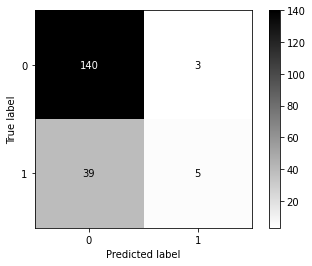

In [ ]:
# Matriz de Confusión
mc = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(mc).plot(cmap = 'binary')

Con los resultados de la matriz de confusión se concluye que en el modelo de regresión logística se obtuvo:

* 140  de las predicciones son verdaderos negativos.
* 5 de de las predecciones son verdaderos positivos.   
* 3 de las predecciones son falsos positivos.  
* 39 de las predecciones son falsos negativos. 



In [ ]:
# Buena Predicción

print("Puntajes Regresión Logistica sin normalizar \n")
print("Precisión:", precision_score(y_test, y_pred, average = None).round(3))
print("Exactitud:", accuracy_score(y_test, y_pred).round(3))
print("Sensibilidad:", recall_score(y_test, y_pred, average = None).round(3))
print("Puntaje AUC:", roc_auc_score(y_test, y_predp[:,1]).round(4))

Puntajes Regresión Logistica sin normalizar 

Precisión: [0.782 0.625]
Exactitud: 0.775
Sensibilidad: [0.979 0.114]
Puntaje AUC: 0.7859


Del informe de las métricas del modelo se afirma lo siguiente: 


*   **Precisión:** El modelo clasifica el $78.2.5\%$ de los datos correspondientes a **True** y el $62.5\%$  de los datos correspondientes a **False** correctamente.
*   **Exactitud:**  El modelo clasifica el $77.5\%$ de los datos correctamente.
*   **Sensibilidad:** El modelo clasifica el $97.9\%$ de los datos como **True** y el $11.4\%$  de los datos como **False**.
*   **Puntaje AUC:** Hay un $78.6\%$ de probabilidad que el modelo pueda distinguir entre **True** y **False**.




## Regresión Logística Normalizando

Con el fin de mejorar la capacidad de predecir del modelo, se verifica que al comparar los datos se tenga un comportamiento lineal. La varianza de las variables independientes sean igualmente comparables.

In [ ]:
X_train.var().round(3)

Recency           66.929
Frequency         33.830
Monetary     2114363.700
Time             611.147
dtype: float64

In [ ]:
X_test.var().round(3)

Recency           61.692
Frequency         34.887
Monetary     2180416.595
Time             533.939
dtype: float64

Se observa que la variable **Monetary** en el conjunto de datos tiene una variación alta, esto podría afectar la capacidad del modelo para aprender de otras variables. Es por ello que se realiza una normalización logarítmica a la variable (Monetary).

In [ ]:
# Copiar los datos a normalizar

X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# Especificar columna a normalizar

col_to_normalize = "Monetary"

# Normalización Logarítmica

for df_ in [X_train_normed, X_test_normed]:
    # Agregar variable normalizada
    df_["MonetaryLog"] = np.log(df_[col_to_normalize])
    # Quitar variable no normalizada
    df_.drop(columns=col_to_normalize, inplace=True)

Se verifica nuevamente las varianzas. Notando que estas tienen el mismo orden de magnitud. Lo anterior implica que todas las variables independientes sean igual de importantes para el modelo.

In [ ]:
X_train_normed.var().round(3)

Recency         66.929
Frequency       33.830
Time           611.147
MonetaryLog      0.837
dtype: float64

In [ ]:
X_test_normed.var().round(3)

Recency         61.692
Frequency       34.887
Time           533.939
MonetaryLog      0.828
dtype: float64

In [ ]:
# Regresión Logística

logreg2 =  linear_model.LogisticRegression(
    C = 0.1,
    solver='liblinear',
    random_state=42
)

# Entrenar el modelo

logreg2.fit(X_train_normed, y_train);

In [ ]:
y_pred2 = logreg2.predict(X_test_normed)
y_pred2p = logreg2.predict_proba(X_test_normed)

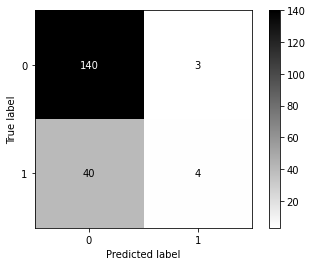

In [ ]:
mc2 = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(mc2).plot(cmap = 'binary')


Con los resultados de la matriz de confusión se concluye que en el modelo de regresión logística se obtuvo:

* 140  de las predicciones son verdaderos negativos.
* 4 de de las predecciones son verdaderos positivos.   
* 3 de las predecciones son falsos positivos.  
* 40 de las predecciones son falsos negativos. 



In [ ]:
# Buena Predicción

print("Puntajes regresión logística normalizando \n")
print("Precisión:", precision_score(y_test, y_pred2, average = None).round(3))
print("Exactitud:", accuracy_score(y_test, y_pred2).round(3))
print("Sensibilidad:", recall_score(y_test, y_pred2, average = None).round(3))
print("Puntaje AUC:", roc_auc_score(y_test, y_pred2p[:,1]).round(3))

Puntajes regresión logística normalizando 

Precisión: [0.778 0.571]
Exactitud: 0.77
Sensibilidad: [0.979 0.091]
Puntaje AUC: 0.787


Del informe de las métricas del modelo se afirma lo siguiente: 


*   **Precisión:** El modelo clasifica el $77.8\%$ de los datos correspondientes a **True** y el $57.1\%$  de los datos correspondientes a **False** correctamente.
*   **Exactitud:**  El modelo clasifica el $77\%$ de los datos correctamente.
*   **Sensibilidad:** El modelo clasifica el $97.9\%$ de los datos como **True** y el $9.1\%$  de los datos como **False**.
*   **Puntaje AUC:** Hay un $78.7\%$ de probabilidad que el modelo pueda distinguir entre **True** y **False**.




## Conclusiones

A través de la regresión logística sugerida por `TPOT` se logró construir un modelo de predección con un puntaje de **AUC=** $0.785$. Aunque este puntaje es muy bueno se realizó una normalización de los datos, dando así un nuevo modelo con un puntaje **AUC=** $0.787$. El incremento es pequeño, pero es de suma importancia si se desea mejorar la capacidad de predección del modelo.

De igual manera en el desarrollo del documento se evidencia que cada variable independiente influye notablemente en el comportamiento de la variable objetivo (**Donated**).

